## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1231]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [1232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

In [1233]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `insurance.csv` dataset.

<b>Note: Remember to label plot axes while plotting.</b>

In [1234]:
# Load the dataset
insurance_df = pd.read_csv('drive/MyDrive/HW1/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**1.1 Create a bar chart to compare the average insurance charges by sex and region.**


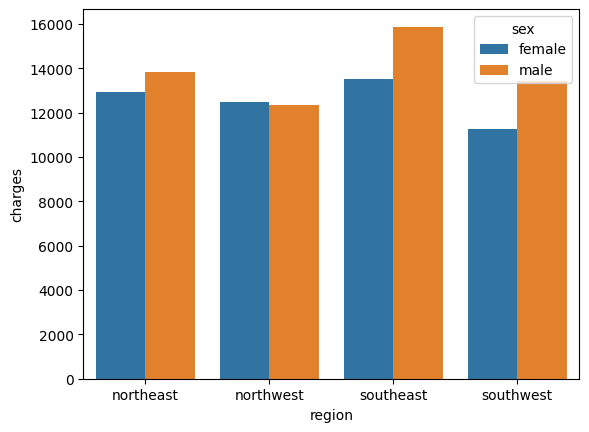

In [1235]:
### Code here
sex_region_insurance = insurance_df.groupby(['sex', 'region'])['charges'].mean().reset_index()
sns.barplot(data=sex_region_insurance, x='region', y='charges', hue='sex')
plt.show()

In [1236]:
### Comment here
'''
The dataframe is first grouped by sex and region to
calculate the mean per each combination.

A barplot is then generated using the seaborn library,
defining x as the region and charges as the value, with
split by sex within each region.
'''

'\nThe dataframe is first grouped by sex and region to\ncalculate the mean per each combination.\n\nA barplot is then generated using the seaborn library,\ndefining x as the region and charges as the value, with\nsplit by sex within each region.\n'

**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **sex**
2. **region**
3. **children**
4. **smoker**

**Make subplots in the same graph**

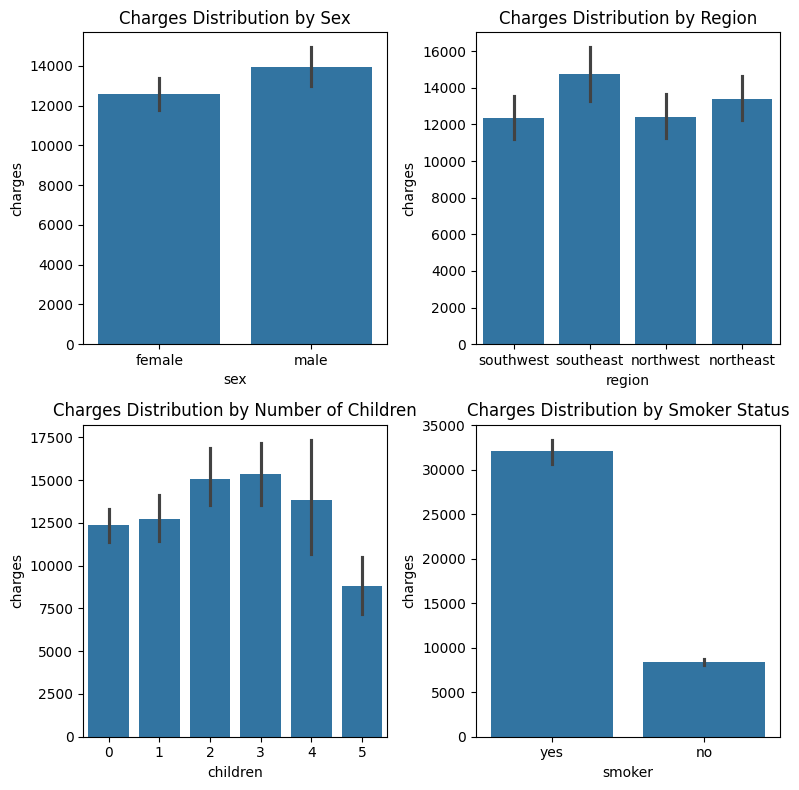

In [1237]:
### Code here
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.barplot(data=insurance_df, x='sex', y='charges', ax=axs[0, 0])
axs[0, 0].set_title('Charges Distribution by Sex')
sns.barplot(data=insurance_df, x='region', y='charges', ax=axs[0, 1])
axs[0, 1].set_title('Charges Distribution by Region')
sns.barplot(data=insurance_df, x='children', y='charges', ax=axs[1, 0])
axs[1, 0].set_title('Charges Distribution by Number of Children')
sns.barplot(data=insurance_df, x='smoker', y='charges', ax=axs[1, 1])
axs[1, 1].set_title('Charges Distribution by Smoker Status')

plt.tight_layout()
plt.show()

**1.3 Compare the insurance charges by age and smoker. Create a Scatter plot for age vs insurance charges categorize them by smoker type.**

<Axes: xlabel='age', ylabel='charges'>

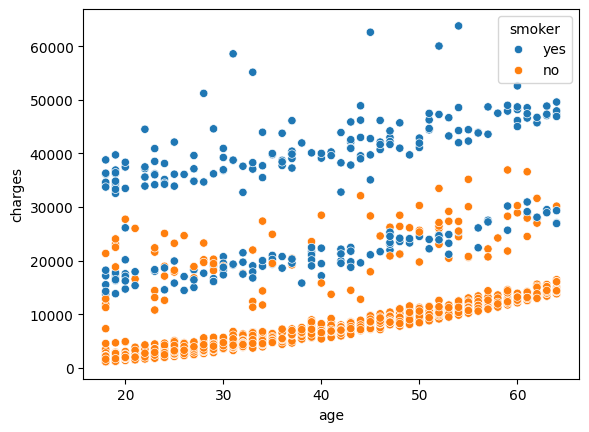

In [1238]:
### Code here
sns.scatterplot(insurance_df, x = 'age', y = 'charges', hue = 'smoker')

## **Part 2: Linear Models for Regression and Classification**

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**.

### **2.1 Linear Regression**
We will now proceed with splitting the dataset and implementing linear regression to predict `insurance charges`.

In [1239]:
# Split the dataset into features and labels
insurance_X = insurance_df.drop(columns=['charges'])
insurance_y = insurance_df['charges']

**2.1.1 Plot relationships between features (age, bmi, children, region) and the target variable `charges` as a small multiple of scatter plots.**
1. age
2. bmi
3. children
4. region

Make sure to label the axes.
<b></b>

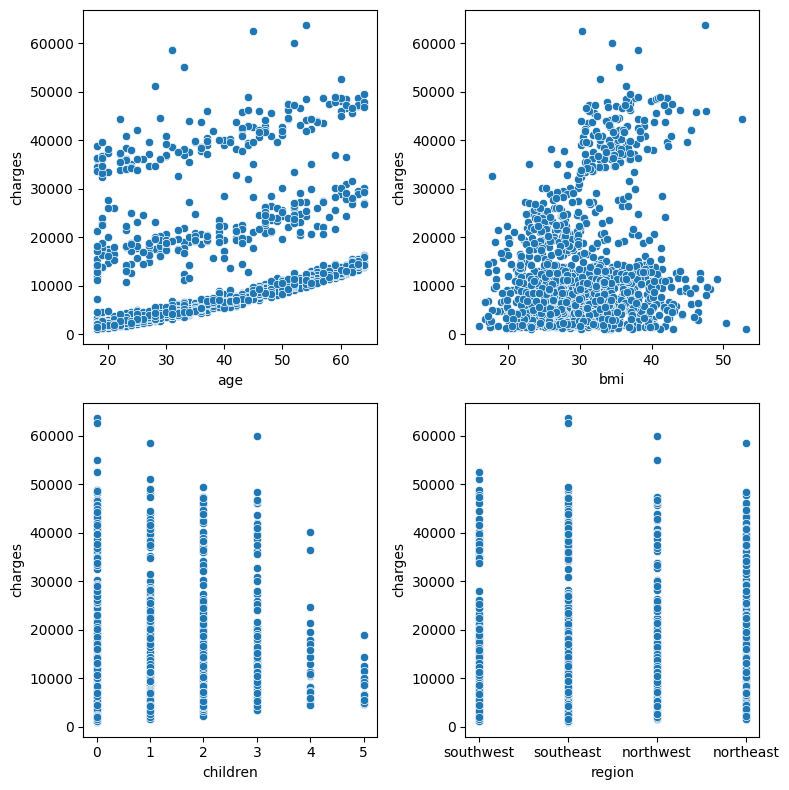

In [1240]:
### Code here
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
i = 0
for X in insurance_X:
    if X in ('age', 'bmi', 'children', 'region'):
        sns.scatterplot(data=insurance_df, x=X, y='charges', ax=axs[i//2][i%2])
        i += 1
plt.tight_layout()
plt.show()


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


In [1241]:
### Comment here
'''
No, however there seems to be an upward trend in the age and charges, especially when grouping the data by category and comparing against smoker status.
On its own, the relationship does not seem to be linear when comparing different X variables and may require additional exploration to determine its
relation. BMI and children show a high degree of variability, and region is categorical making it difficult to measure its linear relationship. More
exploration, feature engineering, and possibly non-linear models may be needed to better understand and model the relationship between the variables and charges.
'''

'\nNo, however there seems to be an upward trend in the age and charges, especially when grouping the data by category and comparing against smoker status.\nOn its own, the relationship does not seem to be linear when comparing different X variables and may require additional exploration to determine its\nrelation. BMI and children show a high degree of variability, and region is categorical making it difficult to measure its linear relationship. More\nexploration, feature engineering, and possibly non-linear models may be needed to better understand and model the relationship between the variables and charges.\n'

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `sex`, `smoker`, `region`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.3 Encode the categorical variables of the Insurance dataset.**

In [1242]:
### Code here
categories = ['sex', 'smoker', 'region']
encoded_insurance_X = pd.get_dummies(insurance_X, categories, dtype=int)
encoded_insurance_X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.8). If yes, drop one from each pair of highly correlated features from the dataframe. It is fine if you do not find any highly correlated features. Why could this be necessary before proceeding further?**

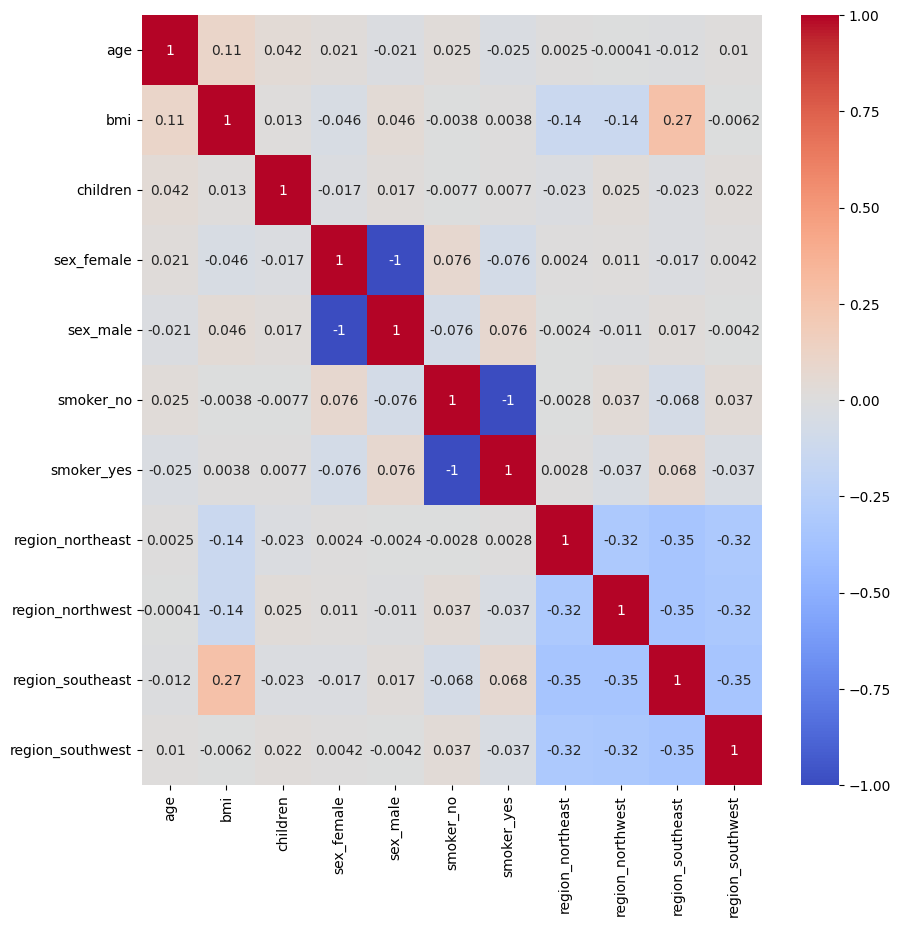

In [1243]:
### Code here
# numerical_features = ['age', 'bmi', 'children']
corr_matrix = encoded_insurance_X.corr()
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
encoded_insurance_X = encoded_insurance_X.drop(columns=['sex_male', 'smoker_no'])

In [1244]:
### Comment here
'''
This is important before moving forward to avoid multi-collinearity,
which can lead to unstable models and lower predictive performance.
'''

'\nThis is important before moving forward to avoid multi-collinearity,\nwhich can lead to unstable models and lower predictive performance.\n'

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [1245]:
### Code here
train_X, test_X, train_y, test_y = train_test_split(encoded_insurance_X, insurance_y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25,random_state=42)


**2.1.6 Standardize the columns in the feature matrices.**

In [1246]:
### Code here
ss = StandardScaler()
insurance_X_train = ss.fit_transform(train_X)
insurance_X_val = ss.transform(val_X)
insurance_X_test = ss.transform(test_X)

In [1247]:
print(train_X.head())
print(insurance_X_train[3])

      age     bmi  children  sex_female  smoker_yes  region_northeast  \
40     24  26.600         0           1           0                 1   
994    27  20.045         3           1           1                 0   
165    47  28.215         4           0           0                 1   
1057   45  31.790         0           1           0                 0   
418    64  39.160         1           0           0                 0   

      region_northwest  region_southeast  region_southwest  
40                   0                 0                 0  
994                  1                 0                 0  
165                  0                 0                 0  
1057                 0                 1                 0  
418                  0                 1                 0  
[ 0.41889351  0.20665259 -0.90396338  1.0227015  -0.50894665 -0.57831012
 -0.54757458  1.72345497 -0.60327902]


In [1248]:
# Adding a column of ones to include the bias term

insurance_X_train = np.hstack([np.ones((insurance_X_train.shape[0], 1)), insurance_X_train])
insurance_X_val = np.hstack([np.ones((insurance_X_val.shape[0], 1)), insurance_X_val])
insurance_X_test = np.hstack([np.ones((insurance_X_test.shape[0], 1)), insurance_X_test])

In [1249]:
insurance_y_train = train_y
insurance_y_val = val_y
insurance_y_test = test_y

At the end of this pre-processing, you should have the following vectors and matrices:

- **insurance_X_train**: Training set feature matrix.
- **insurance_X_val**: Validation set feature matrix.
- **insurance_X_test**: Test set feature matrix.
- **insurance_y_train**: Training set labels (insurance charges).
- **insurance_y_val**: Validation set labels.
- **insurance_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$





**2.1.7 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [1250]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        m, n = X.shape
        I = np.eye(n)
        self.w = np.linalg.solve(X.T @ X + self.alpha * I, X.T @ y)

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return X @ self.w


**2.1.8 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the insurance dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [1251]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [1252]:
### Code here
model = LinearRegression(alpha=0)
model.train(insurance_X_train, insurance_y_train)

y_pred_train = model.predict(insurance_X_train)
y_pred_val = model.predict(insurance_X_val)
y_pred_test = model.predict(insurance_X_test)

r2_train = r2_score(insurance_y_train, y_pred_train)
r2_val = r2_score(insurance_y_val, y_pred_val)
r2_test = r2_score(insurance_y_test, y_pred_test)

print(f'R^2 score on training set: {r2_train}')
print(f'R^2 score on validation set: {r2_val}')
print(f'R^2 score on test set: {r2_test}')

get_report(y_pred_test, test_y)

R^2 score on training set: 0.7456575125269083
R^2 score on validation set: 0.7282907846159223
R^2 score on test set: 0.7825828922009138


,Prediction,Actual
Position,,
1,8822.361197,9095.06825
2,6919.890821,5272.17580
3,36208.994457,29330.98315
266,7454.552824,6067.12675
267,40531.472584,63770.42801
268,12267.581092,9872.70100


**2.1.9 Use the mean of the training labels (insurance_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [1253]:
### Code here

mean_train_y = np.mean(train_y)

r2_train = r2_score(train_y, [mean_train_y] * len(train_y))
r2_val = r2_score(val_y, [mean_train_y] * len(val_y))
r2_test = r2_score(test_y, [mean_train_y] * len(test_y))

print(f'R^2 score on training set: {r2_train}')
print(f'R^2 score on validation set: {r2_val}')
print(f'R^2 score on test set: {r2_test}')

print(get_report([mean_train_y] * len(test_y), test_y))
print(get_report([mean_train_y] * len(val_y), val_y))
print(get_report([mean_train_y] * len(train_y), train_y))

R^2 score on training set: 0.0
R^2 score on validation set: -0.008875704081438007
R^2 score on test set: -3.287713156874261e-05
            Prediction       Actual
Position                           
1         13039.760278   9095.06825
2         13039.760278   5272.17580
3         13039.760278  29330.98315
266       13039.760278   6067.12675
267       13039.760278  63770.42801
268       13039.760278   9872.70100
            Prediction       Actual
Position                           
1         13039.760278  39727.61400
2         13039.760278   5400.98050
3         13039.760278  42211.13820
266       13039.760278  11013.71190
267       13039.760278  62592.87309
268       13039.760278  27808.72510
            Prediction       Actual
Position                           
1         13039.760278   3046.06200
2         13039.760278  16420.49455
3         13039.760278  10407.08585
800       13039.760278  11033.66170
801       13039.760278   1627.28245
802       13039.760278   3443.06400


**2.1.10 Interpret your model trained on the insurance dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

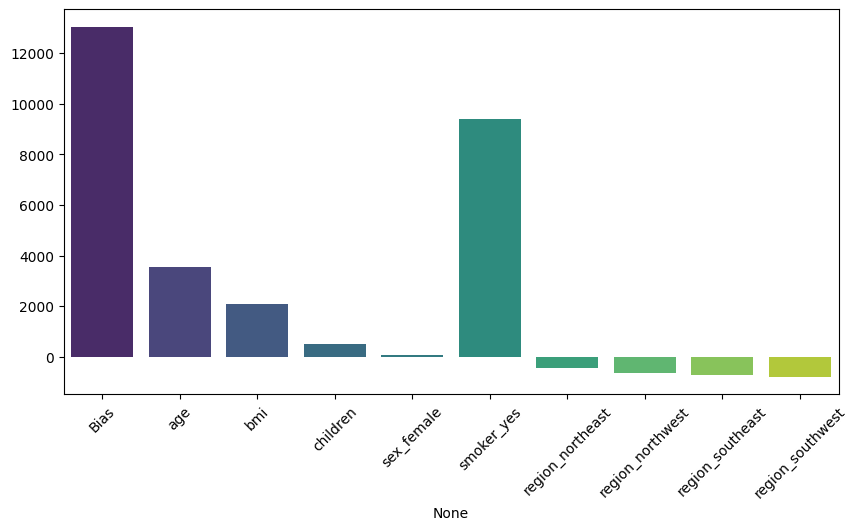

In [1254]:
# Code Here
fig = plt.figure(figsize=(10, 5))
# include bias
x_label = np.insert(encoded_insurance_X.columns, 0, 'Bias')
ax = sns.barplot(x=x_label, y=model.w, palette="viridis", hue = x_label)
plt.xticks(rotation=45)
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to insurance charges?**

In [1255]:
### Comment here
"""
Bias has the greatest contribution.
Smoker has the second greatest contribution.
Age has the third greatest contribution.

Since the Bias is the greatest contributor, it suggests that the average insurance
charges are not influenced by the features captured in the model, and is likely
that other features not included in the dataset or non-linear relationships between
existing features play a significant role.
"""

'\nBias has the greatest contribution.\nSmoker has the second greatest contribution.\nAge has the third greatest contribution.\n\nSince the Bias is the greatest contributor, it suggests that the average insurance\ncharges are not influenced by the features captured in the model, and is likely\nthat other features not included in the dataset or non-linear relationships between\nexisting features play a significant role.\n'

### **Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the insurance dataset.

**2.1.12 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.****

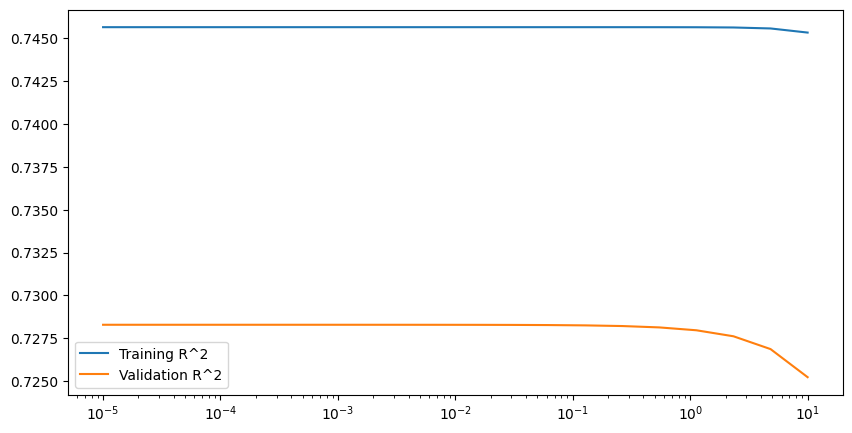

In [1256]:
### Code here
alphas = np.logspace(-5, 1, 20)
train_r2 = []
val_r2 = []
for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    model.train(insurance_X_train, insurance_y_train)
    y_pred_train = model.predict(insurance_X_train)
    y_pred_val = model.predict(insurance_X_val)
    train_r2.append(r2_score(insurance_y_train, y_pred_train))
    val_r2.append(r2_score(insurance_y_val, y_pred_val))
fig = plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=alphas, y=train_r2, label='Training R^2')
ax = sns.lineplot(x=alphas, y=val_r2, label='Validation R^2')
plt.xscale('log')
plt.show()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

In [1257]:
### Comment here
'''
As alpha increases, both the training and validation R^2 scores slightly decreases after
log(alpha) exceeds 10^0. Until then it is flat.
'''

'\nAs alpha increases, both the training and validation R^2 scores slightly decreases after\nlog(alpha) exceeds 10^0. Until then it is flat.\n'

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [1258]:
### Code here
loan_data_df = pd.read_csv('drive/MyDrive/HW1/loan_data.csv')
print(loan_data_df.dtypes)
loan_data_df.head()

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1259]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])
categories = loan_data_df.select_dtypes(include='object').columns
categories

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [1260]:
### Code here
loan_data_df.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [1261]:
loan_data_df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,592.000000,600.00000,564.000000
mean,146.412162,342.00000,0.842199
std,85.587325,65.12041,0.364878
min,9.000000,12.00000,0.000000
25%,100.000000,360.00000,1.000000
50%,128.000000,360.00000,1.000000
75%,168.000000,360.00000,1.000000
max,700.000000,480.00000,1.000000


In [1262]:
### Code here
from sklearn.impute import SimpleImputer

# imputated the terms for credit history, loan_amount_term, and loan_amount using the mean
loan_data_df[['Credit_History', 'Loan_Amount_Term', 'LoanAmount']] = SimpleImputer(strategy='mean').fit_transform(loan_data_df[['Credit_History', 'Loan_Amount_Term', 'LoanAmount']])

# dropped missing rows that were up to only 15 data points.
loan_data_df = loan_data_df.dropna(subset=['Married', 'Gender', 'Dependents', 'Self_Employed'])

loan_data_df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [1263]:
loan_data_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1264]:
### Comment here
'''
There is missing data for columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term,
Credit_History. The best way to deal with these data depends on the data type and its context.

The ways we are taught handle data is to:
- Drop column (typically used as a baseline)
- Drop rows (if there are only a few missing values)
- Imputation
  - using mean or median (SimpleImputer in sklearn API)
  - using k-nearest neighbors (nan_euclidean_distances metric)
  - regression models
  - matrix factorization

In this case, I used the mean to impute most data points for continuous values
and dropped categorical values that are missing since there were only a few.
'''

'\nThere is missing data for columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term,\nCredit_History. The best way to deal with these data depends on the data type and its context.\n\nThe ways we are taught handle data is to:\n- Drop column (typically used as a baseline)\n- Drop rows (if there are only a few missing values)\n- Imputation\n  - using mean or median (SimpleImputer in sklearn API)\n  - using k-nearest neighbors (nan_euclidean_distances metric)\n  - regression models\n  - matrix factorization\n\nIn this case, I used the mean to impute most data points for continuous values\nand dropped categorical values that are missing since there were only a few.\n'

**2.2.3 Encode the categorical variables.**

In [1265]:
for category in categories:
  print(category, loan_data_df[category].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [1266]:
### Code here
encoded_loan_data_df = pd.get_dummies(loan_data_df, categories, drop_first=True, dtype=int)
encoded_loan_data_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [1267]:
print(encoded_loan_data_df.dtypes)


ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                  int64
Married_Yes                  int64
Dependents_1                 int64
Dependents_2                 int64
Dependents_3+                int64
Education_Not Graduate       int64
Self_Employed_Yes            int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
Loan_Status_Y                int64
dtype: object


Loan_Status_Y Loan_Status_Y
1    0.689531
0    0.310469
Name: proportion, dtype: float64


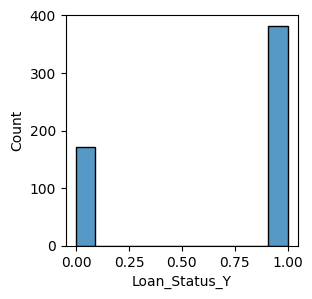

In [1268]:
### Comment here
for columns in (encoded_loan_data_df.select_dtypes(include=['int64']).columns[-1:]):
  print(columns, encoded_loan_data_df[columns].value_counts(normalize=True))
  fig = plt.figure(figsize=(3, 3))
  ax = sns.histplot(data=encoded_loan_data_df, x=columns)
  plt.show()

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [1269]:
### Code here
corr = encoded_loan_data_df.corr()
threshold = 0.9
corr[np.abs(corr) > threshold] = 1

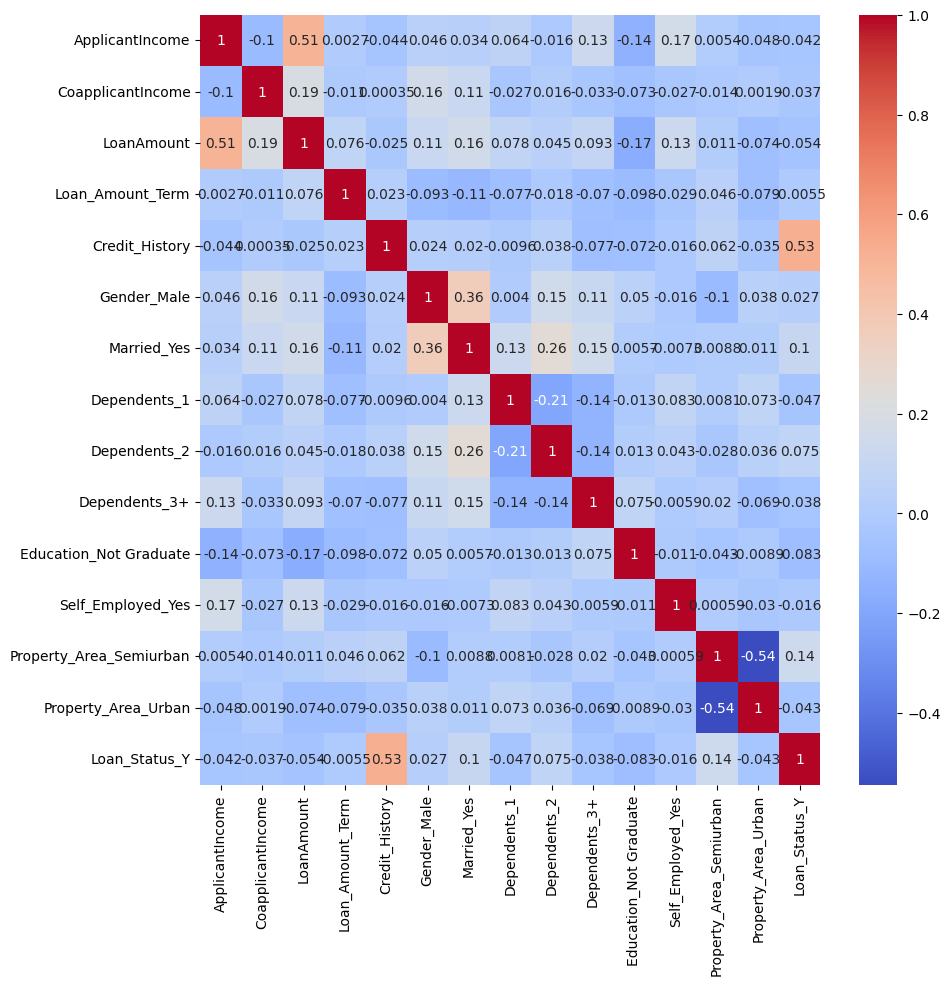

In [1270]:
### Code Here
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [1271]:
### Code here
loan_X = encoded_loan_data_df.drop(columns=['Loan_Status_Y'])
loan_y = encoded_loan_data_df['Loan_Status_Y'].values.reshape(-1, 1)

train_X, test_X, train_y, test_y = train_test_split(loan_X, loan_y, test_size=0.20, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25,random_state=42)

ss = StandardScaler()
train_X = ss.fit_transform(train_X)
val_X = ss.transform(val_X)
test_X = ss.transform(test_X)

train_X = np.hstack([np.ones((train_X.shape[0], 1)), train_X])
val_X = np.hstack([np.ones((val_X.shape[0], 1)), val_X])
test_X = np.hstack([np.ones((test_X.shape[0], 1)), test_X])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [1272]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

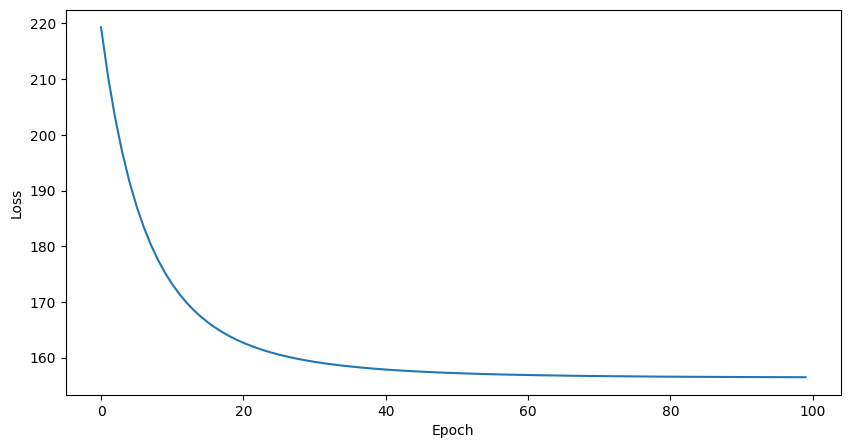

In [1273]:
### Code here
model = LogisticRegression(alpha=0, t=100, eta = 1e-3)
training_loss = model.train(train_X, train_y)
plot_y = [loss[0][0] for loss in training_loss]
epochs = np.arange(len(training_loss))

fig = plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=epochs, y=plot_y)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

In [1274]:
### Code here
from sklearn.metrics import accuracy_score
best_accuracy = 0
best_alpha = 0
best_eta = 0
best_t = 0

for i in range(20):
    alpha = np.random.uniform(0, 1)
    eta = np.random.uniform(0, 0.001)
    t = np.random.randint(0, 100)
    test_model = LogisticRegression(alpha=alpha, t=t, eta=eta)
    test_model.train(train_X, train_y)
    y_pred = test_model.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha
        best_eta = eta
        best_t = t

print(f'Best accuracy: {best_accuracy}')
print(f'Best alpha: {best_alpha}')
print(f'Best eta: {best_eta}')
print(f'Best t: {best_t}')

Best accuracy: 0.8378378378378378
Best alpha: 0.5976752813095394
Best eta: 0.0008018804309789894
Best t: 17


In [1275]:
### Code here
best_model = LogisticRegression(alpha=best_alpha, t=best_t, eta=best_eta)
best_training_loss = best_model.train(train_X, train_y)
y_pred = best_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Accuracy: {accuracy}')

Best Accuracy: 0.8378378378378378


In [1276]:
### Code here
y_pred = model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f'General Accuracy: {accuracy}')

General Accuracy: 0.8378378378378378


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

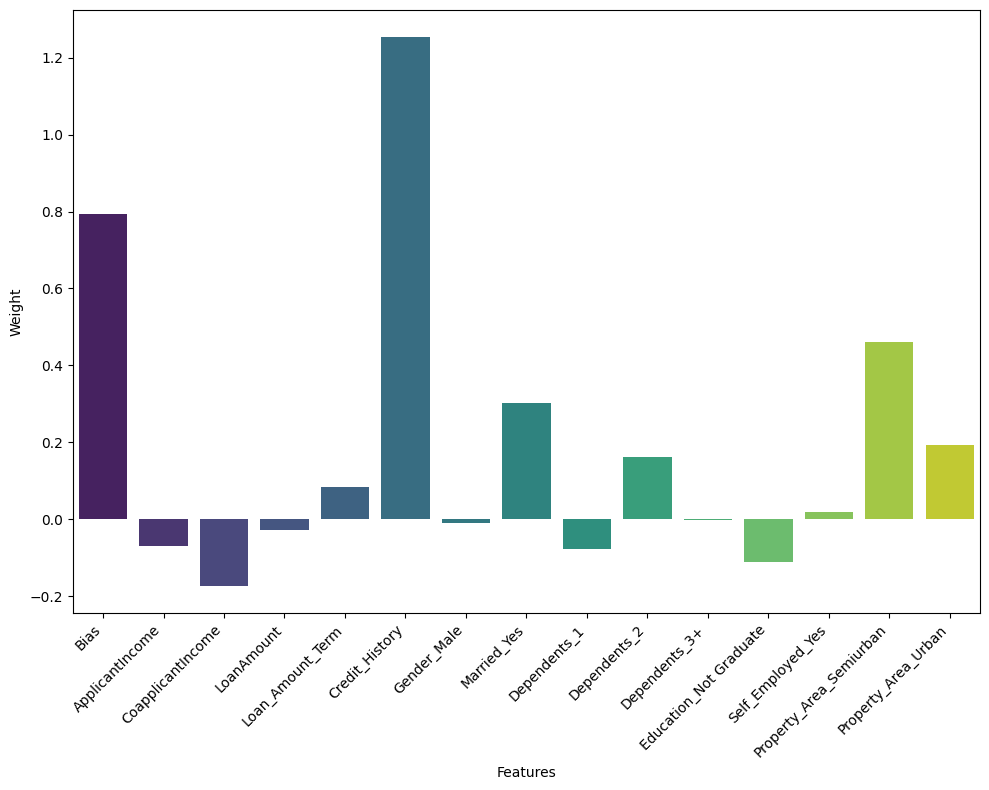

In [1277]:
# Code Here
fig = plt.figure(figsize=(10, 8))

x_label = np.insert(loan_X.columns, 0, 'Bias')
y_values = model.w.reshape(-1)

ax = sns.barplot(x=x_label, y=y_values, palette="viridis", hue = x_label)
ax.set_xlabel('Features')
ax.set_ylabel('Weight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [1278]:
### Comment here
"""
The two features that have the greatest impact are Credit_History and Property_Area_Semiurban.
This implies the Credit_History positively impacts Loan_Status.
"""

'\nThe two features that have the greatest impact are Credit_History and Property_Area_Semiurban.\nThis implies the Credit_History positively impacts Loan_Status.\n'

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [1290]:
### Code here
SVM = LinearSVC(dual=False)
SVM.fit(train_X, train_y.reshape(-1))
y_pred_train = SVM.predict(train_X)
y_pred_val = SVM.predict(val_X)
y_pred_test = SVM.predict(test_X)

print(f'Train Accuracy: {accuracy_score(train_y, y_pred_train)}')
print(f'Validation Accuracy: {accuracy_score(val_y, y_pred_val)}')
print(f'Test Accuracy: {accuracy_score(test_y, y_pred_test)}')

Train Accuracy: 0.8012048192771084
Validation Accuracy: 0.8198198198198198
Test Accuracy: 0.8378378378378378


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [1294]:
### Code here
Dual_SVM = LinearSVC(dual=True, max_iter=10000)
Dual_SVM.fit(train_X, train_y.reshape(-1))
y_pred_train = Dual_SVM.predict(train_X)
y_pred_val = Dual_SVM.predict(val_X)
y_pred_test = Dual_SVM.predict(test_X)

print(f'Train Accuracy: {accuracy_score(train_y, y_pred_train)}')
print(f'Validation Accuracy: {accuracy_score(val_y, y_pred_val)}')
print(f'Test Accuracy: {accuracy_score(test_y, y_pred_test)}')

Train Accuracy: 0.8012048192771084
Validation Accuracy: 0.8198198198198198
Test Accuracy: 0.8378378378378378
